In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Expand dimensions to match CNN input format (batch, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input
import numpy as np
import matplotlib.pyplot as plt

# Define model with explicit input
input_layer = Input(shape=(28, 28, 1))  # Define input explicitly
conv_layer = Conv2D(filters=3, kernel_size=(3, 3), activation=None, name="conv_layer")(input_layer)
flatten_layer = Flatten()(conv_layer)
output_layer = Dense(10, activation="softmax")(flatten_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [5]:
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8083 - loss: 1.0291 - val_accuracy: 0.8933 - val_loss: 0.7750
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8429 - loss: 1.5125 - val_accuracy: 0.9080 - val_loss: 0.6584
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8669 - loss: 1.1015 - val_accuracy: 0.9009 - val_loss: 0.5822
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8863 - loss: 0.8087 - val_accuracy: 0.9120 - val_loss: 0.7504
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8779 - loss: 0.9652 - val_accuracy: 0.8655 - val_loss: 0.5655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8713 - loss: 1.3371 - val_accuracy: 0.8935 - val_loss: 1.0043
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8722 - loss: 1.0688 - val_accuracy: 0.8895 - val_loss: 1.1476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8723 - loss: 1.1315

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


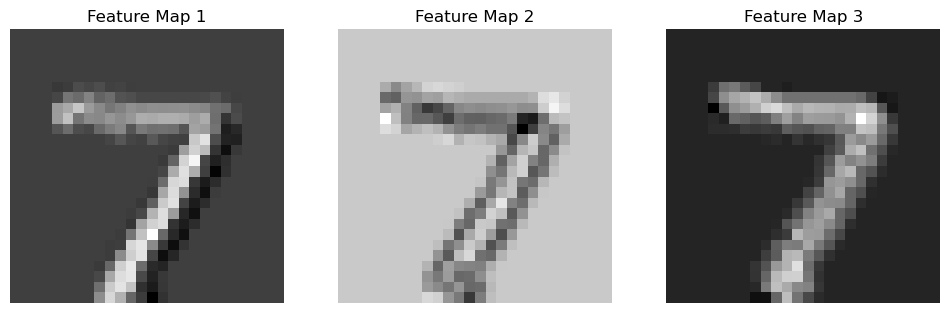

In [19]:
# Pick a sample image from the test set
sample_image = X_test[0:1]  # Shape (1, 28, 28, 1)

# Ensure the model is called once before extracting features
_ = model.predict(sample_image)

# Create a model to output the feature maps
feature_map_model = Model(inputs=model.input, outputs=model.get_layer("conv_layer").output)

# Get feature maps from the CNN
feature_maps = feature_map_model.predict(sample_image)

# Plot feature maps
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):  # We have 3 filters
    axes[i].imshow(feature_maps[0, :, :, i], cmap="gray")
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis("off")

plt.show()